<h2 style='color:red' align="center">Logistic Regression Algorithems</h2>  


# Heart Disease Prediction using Logistic Regression 
<img src="Images/heart.jpg" width="60%">

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Database information 
There are 10 variables:
 + sbp: Systolic blood pressure
 + tobacco: Cumulative tobacco consumption, in kg
 + ldl: Low-density lipoprotein cholesterol
 + adiposity: Adipose tissue concentration
 + famhist: Family history of heart disease (1=Present, 0=Absent)
 + typea: Score on test designed to measure type-A behavior
 + obesity: Obesity
 + alcohol: Current consumption of alcohol
 + age: Age of subject
 + chd: Coronary heart disease at baseline; 1=Yes 0=No


In [4]:
df = pd.read_csv("heart.csv")
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


#### Converting categorical varibales into numbers

In [5]:
history_mapping = {'Absent': 0,'Present': 1}
df["famhist"] = df["famhist"].map(history_mapping)

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


## Data Analysis 

In [6]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age', 'chd']

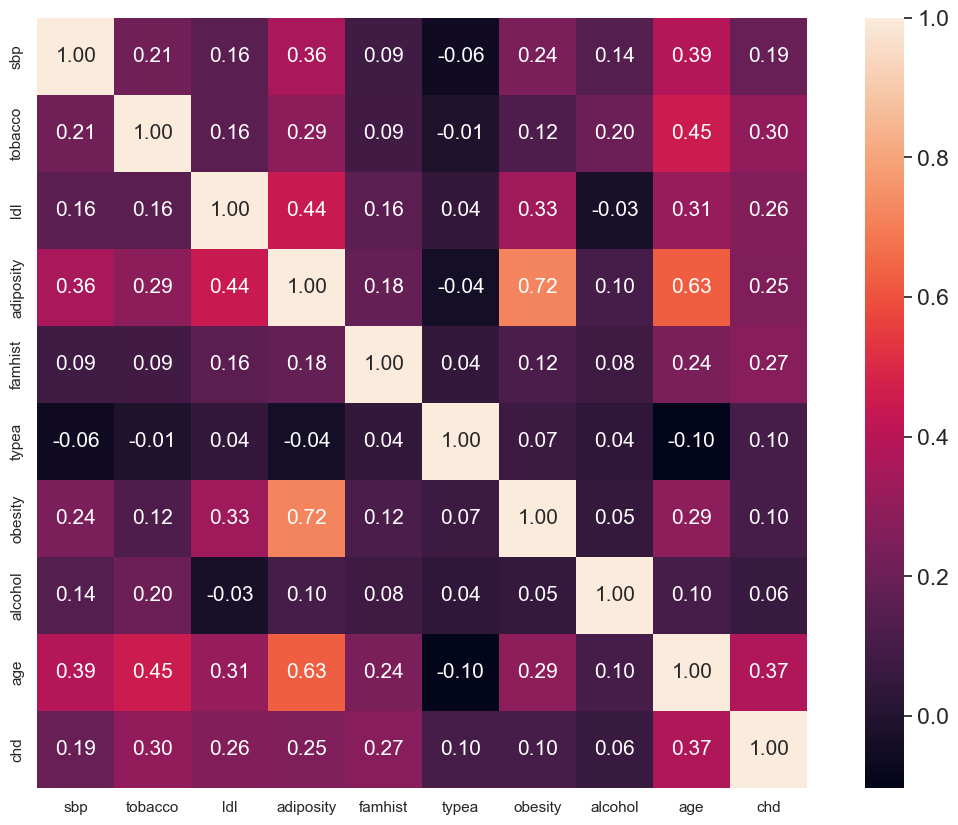

In [7]:
import numpy as np

f, ax = plt.subplots(figsize=(15, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

# Time for Machine Learning 

### Preparing inputs and outputs 

In [8]:
X=df[['tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age']].values
y=df[['chd']].values 

### Prepare Training and Test deta sets 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Apply Logisitc Regression 

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression(C=100, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)


c:\Users\nites\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l1'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


### Reporting accuracy 

In [12]:
print ('Training Accuracy: %.2f' % model.score(X_train,y_train))
print ('Test Accuracy: %.2f' % model.score(X_test,y_test))
        

Training Accuracy: 0.73
Test Accuracy: 0.73
